In [1]:
import torch
import torch.nn as nn
import os
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from tqdm import tqdm
import time
import matplotlib.pyplot as plt

In [2]:
# Todos
# 5. Normalization
# 7. How many layers should we have?
# 6. Figure out the learning rate.

# 2. checkpoint the model when training
# 8. inference/testing notebook

# -1. Check out whether cutting off the head of a Vision Transformer is a doable thing


In [3]:
img_dir = "./train"
from detector.loader import JITDataset, FileDataset

#dataset = JITDataset(length=100, difficulty=0.6)
dataset = FileDataset(img_dir=img_dir)
loader = DataLoader(dataset, batch_size=10, shuffle=True)


In [4]:
from detector.model import Detector

In [5]:
model = Detector()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Adjust learning rate as needed

In [6]:
# This would be nice
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Detector(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1250000, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=3, bias=True)
)

In [7]:
losses = []
def train(model, loader, criterion, optimizer, num_epochs=5):
    global losses
    model.train()  # Set the model to training mode

    for epoch in tqdm(range(num_epochs)):
        running_loss = 0.0
        count = 0
        for inputs, targets in loader:
            inputs, targets = inputs.to(device), targets.to(device)  # Move data to the device

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            count += 1  # Increment count for each batch
            
        losses.append(running_loss / count)

In [8]:
train(model, loader, criterion, optimizer, 1)

100%|█████████████████████████████████████████████| 1/1 [00:42<00:00, 42.96s/it]


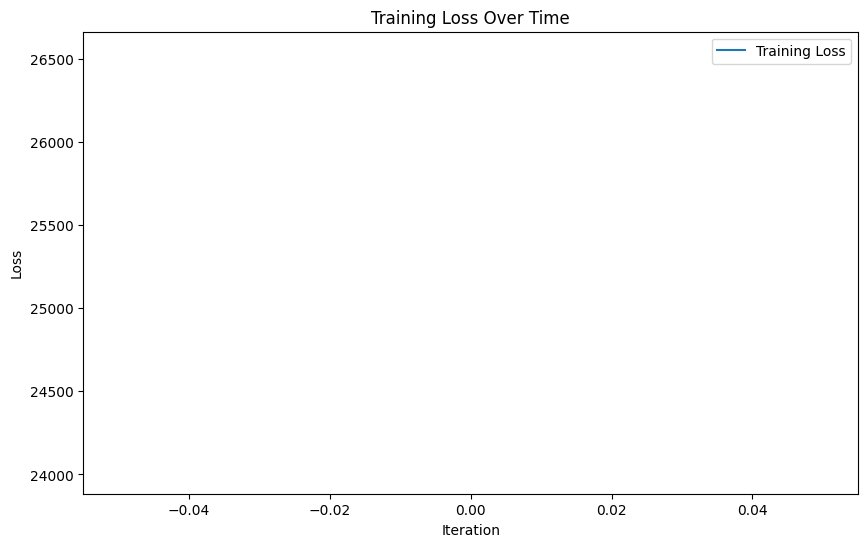

In [74]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(losses, label='Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()
plt.show()